In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('diabetes.csv')

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data.shape

(768, 9)

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


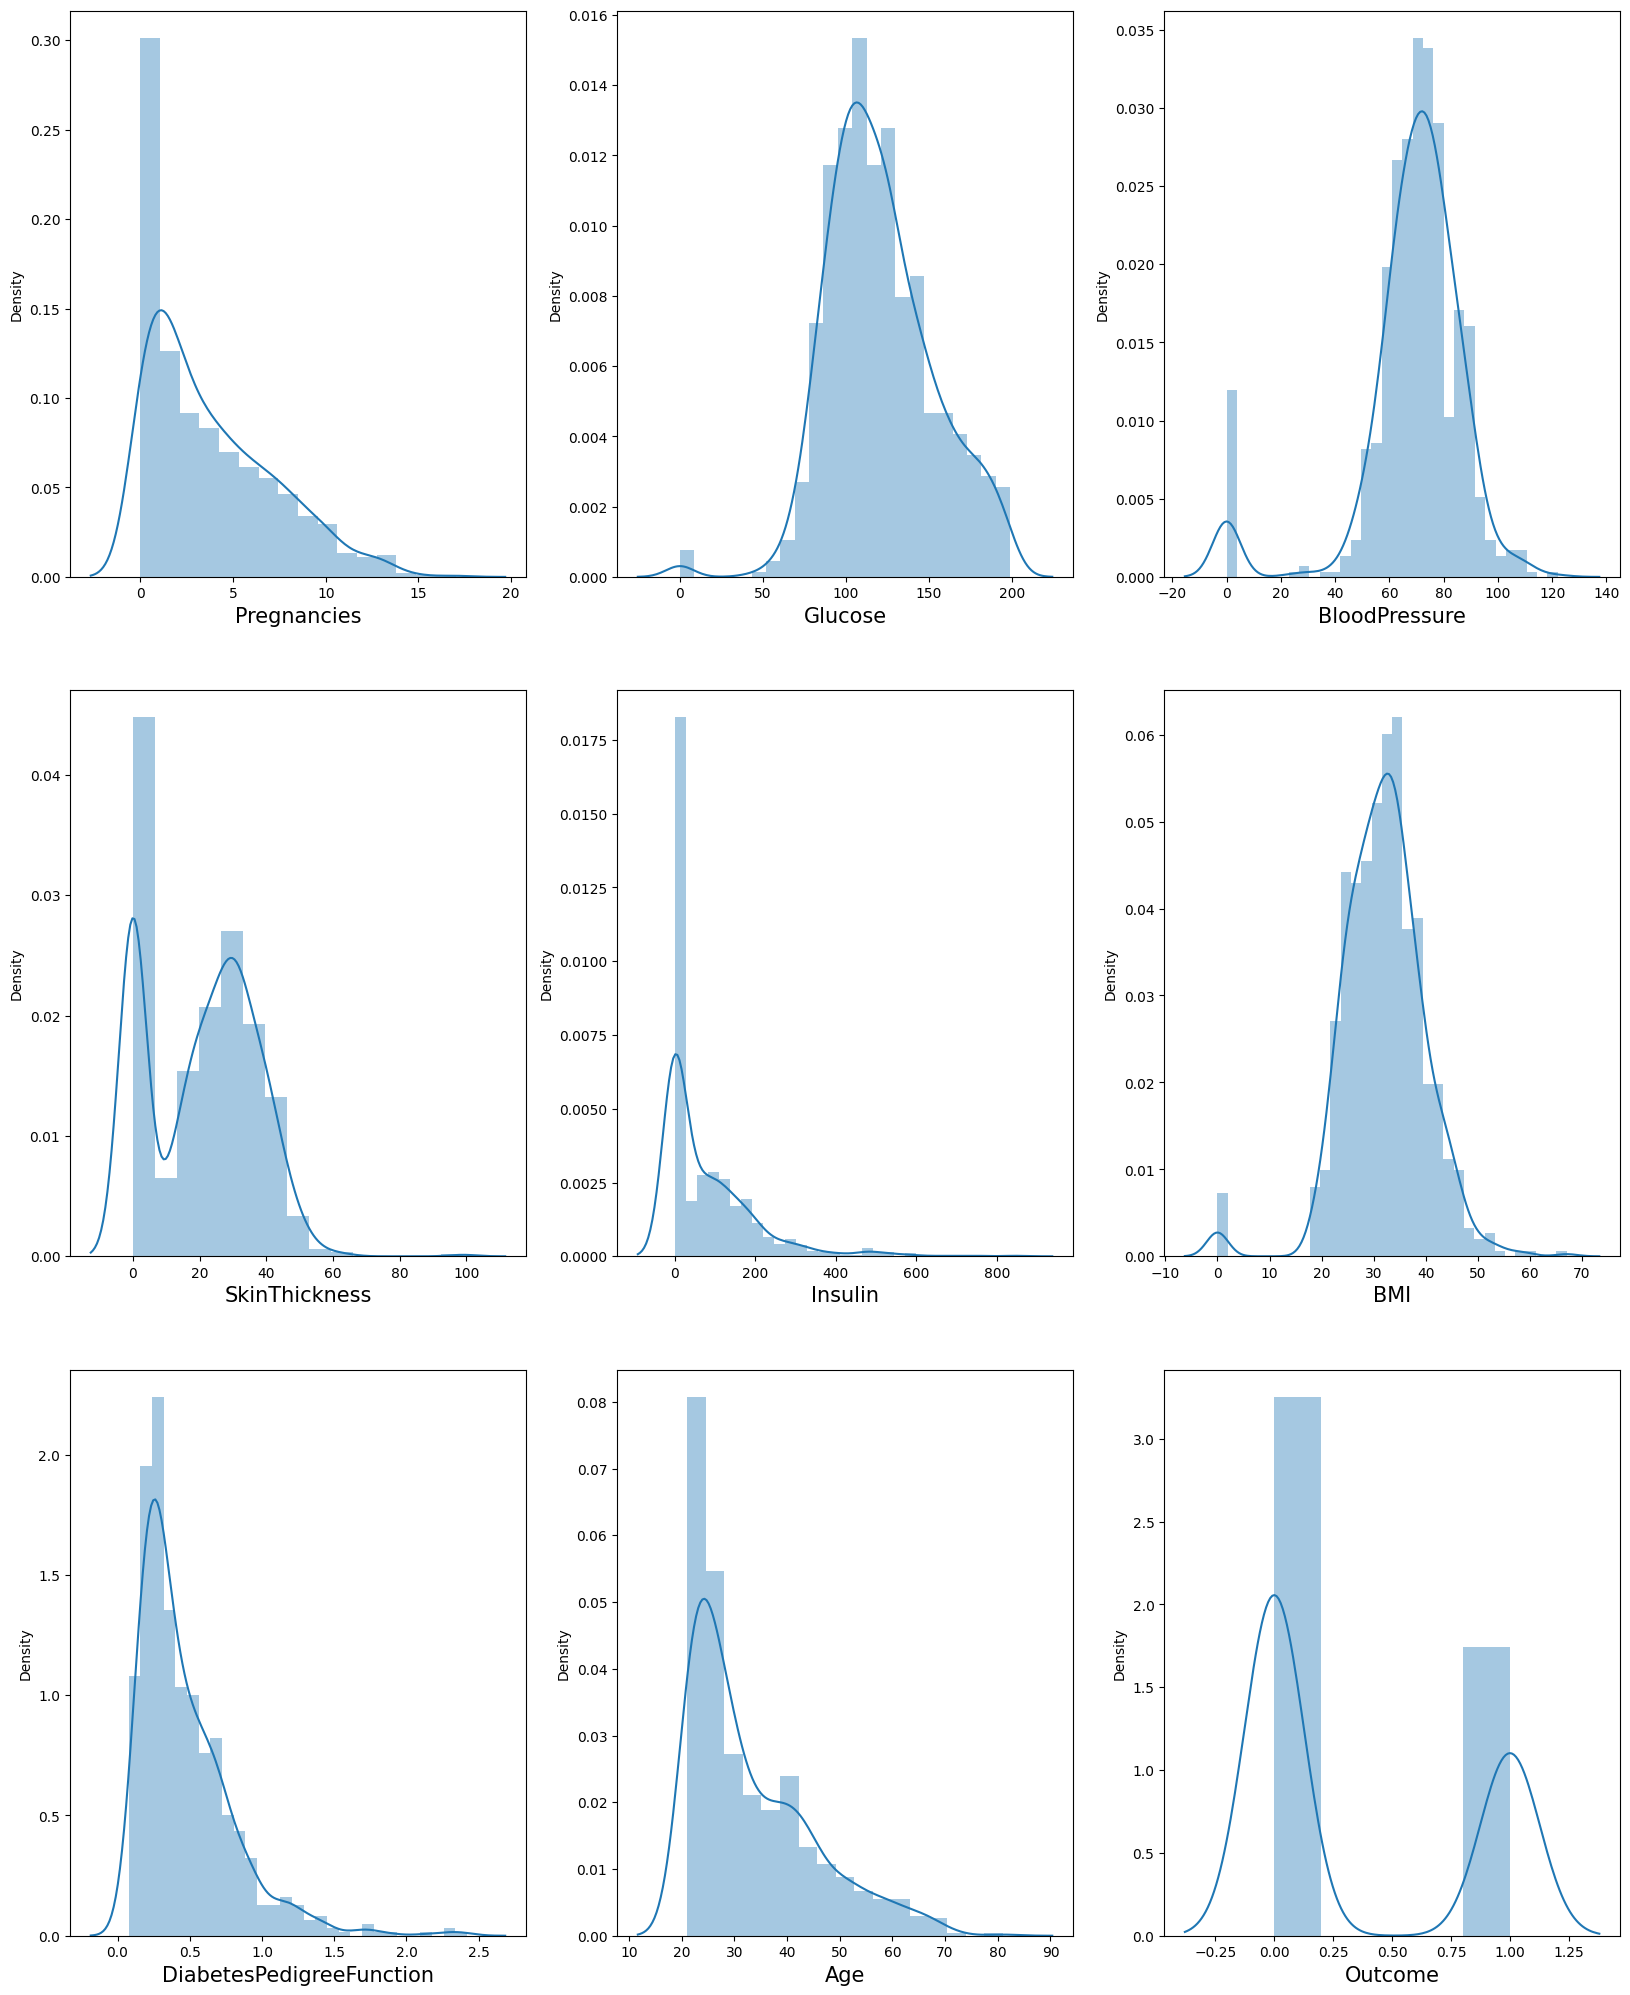

In [22]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [23]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

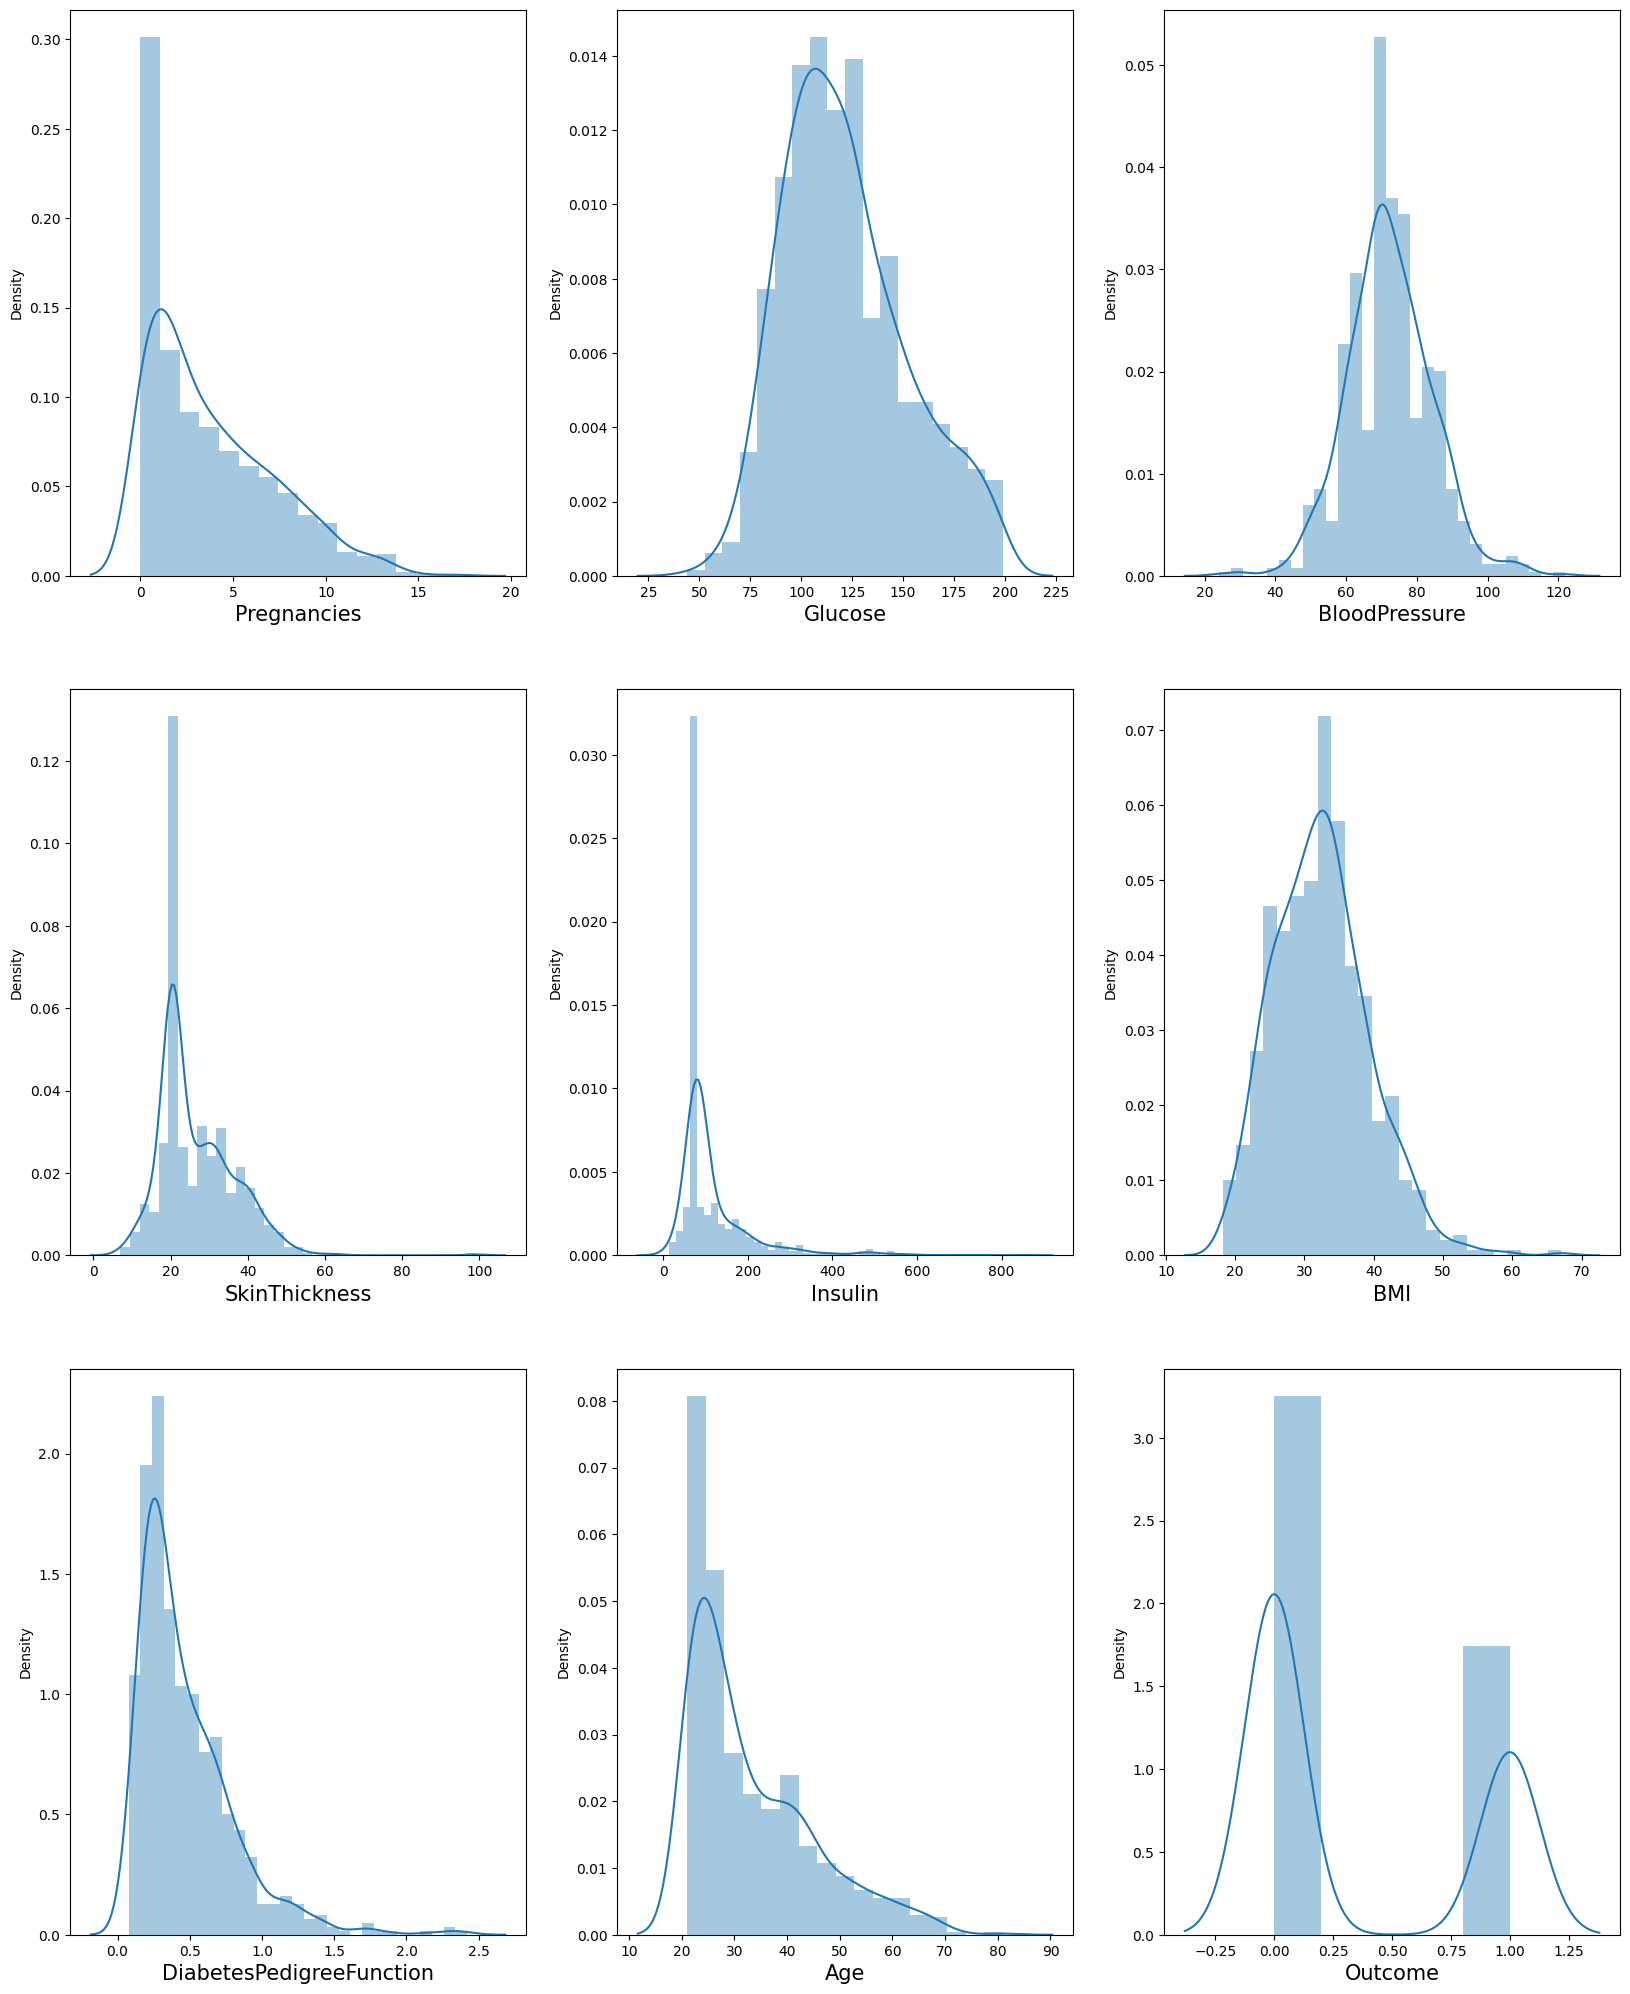

In [24]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

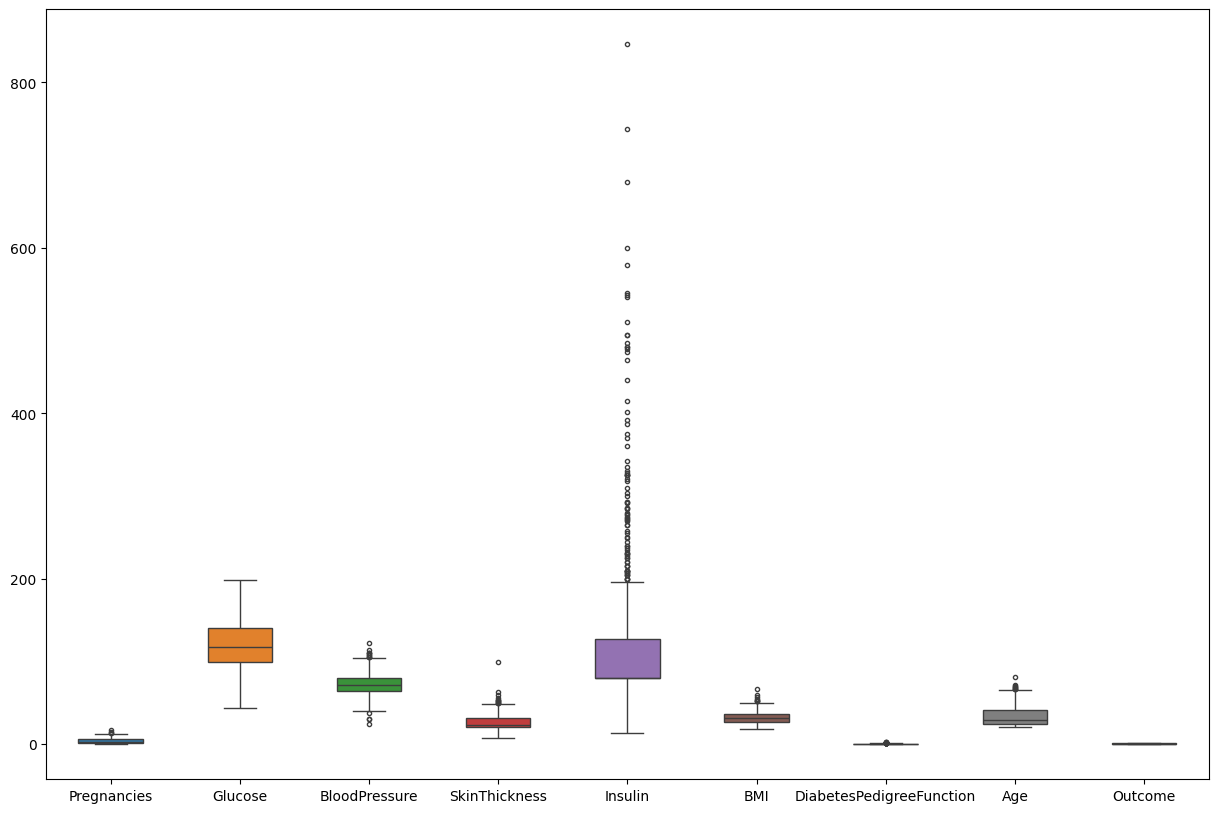

In [25]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.boxplot(data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [26]:
outlier = data["Pregnancies"].quantile(0.98)
data = data[data['Pregnancies']<outlier]
outlier = data["BMI"].quantile(0.99)
data = data[data['BMI']<outlier]
outlier = data["SkinThickness"].quantile(0.99)
data = data[data['SkinThickness']<outlier]
outlier = data["Insulin"].quantile(0.95)
data = data[data['Insulin']<outlier]
outlier = data["DiabetesPedigreeFunction"].quantile(0.99)
data = data[data['DiabetesPedigreeFunction']<outlier]
outlier = data["Age"].quantile(0.99)
data = data[data['Age']<outlier]

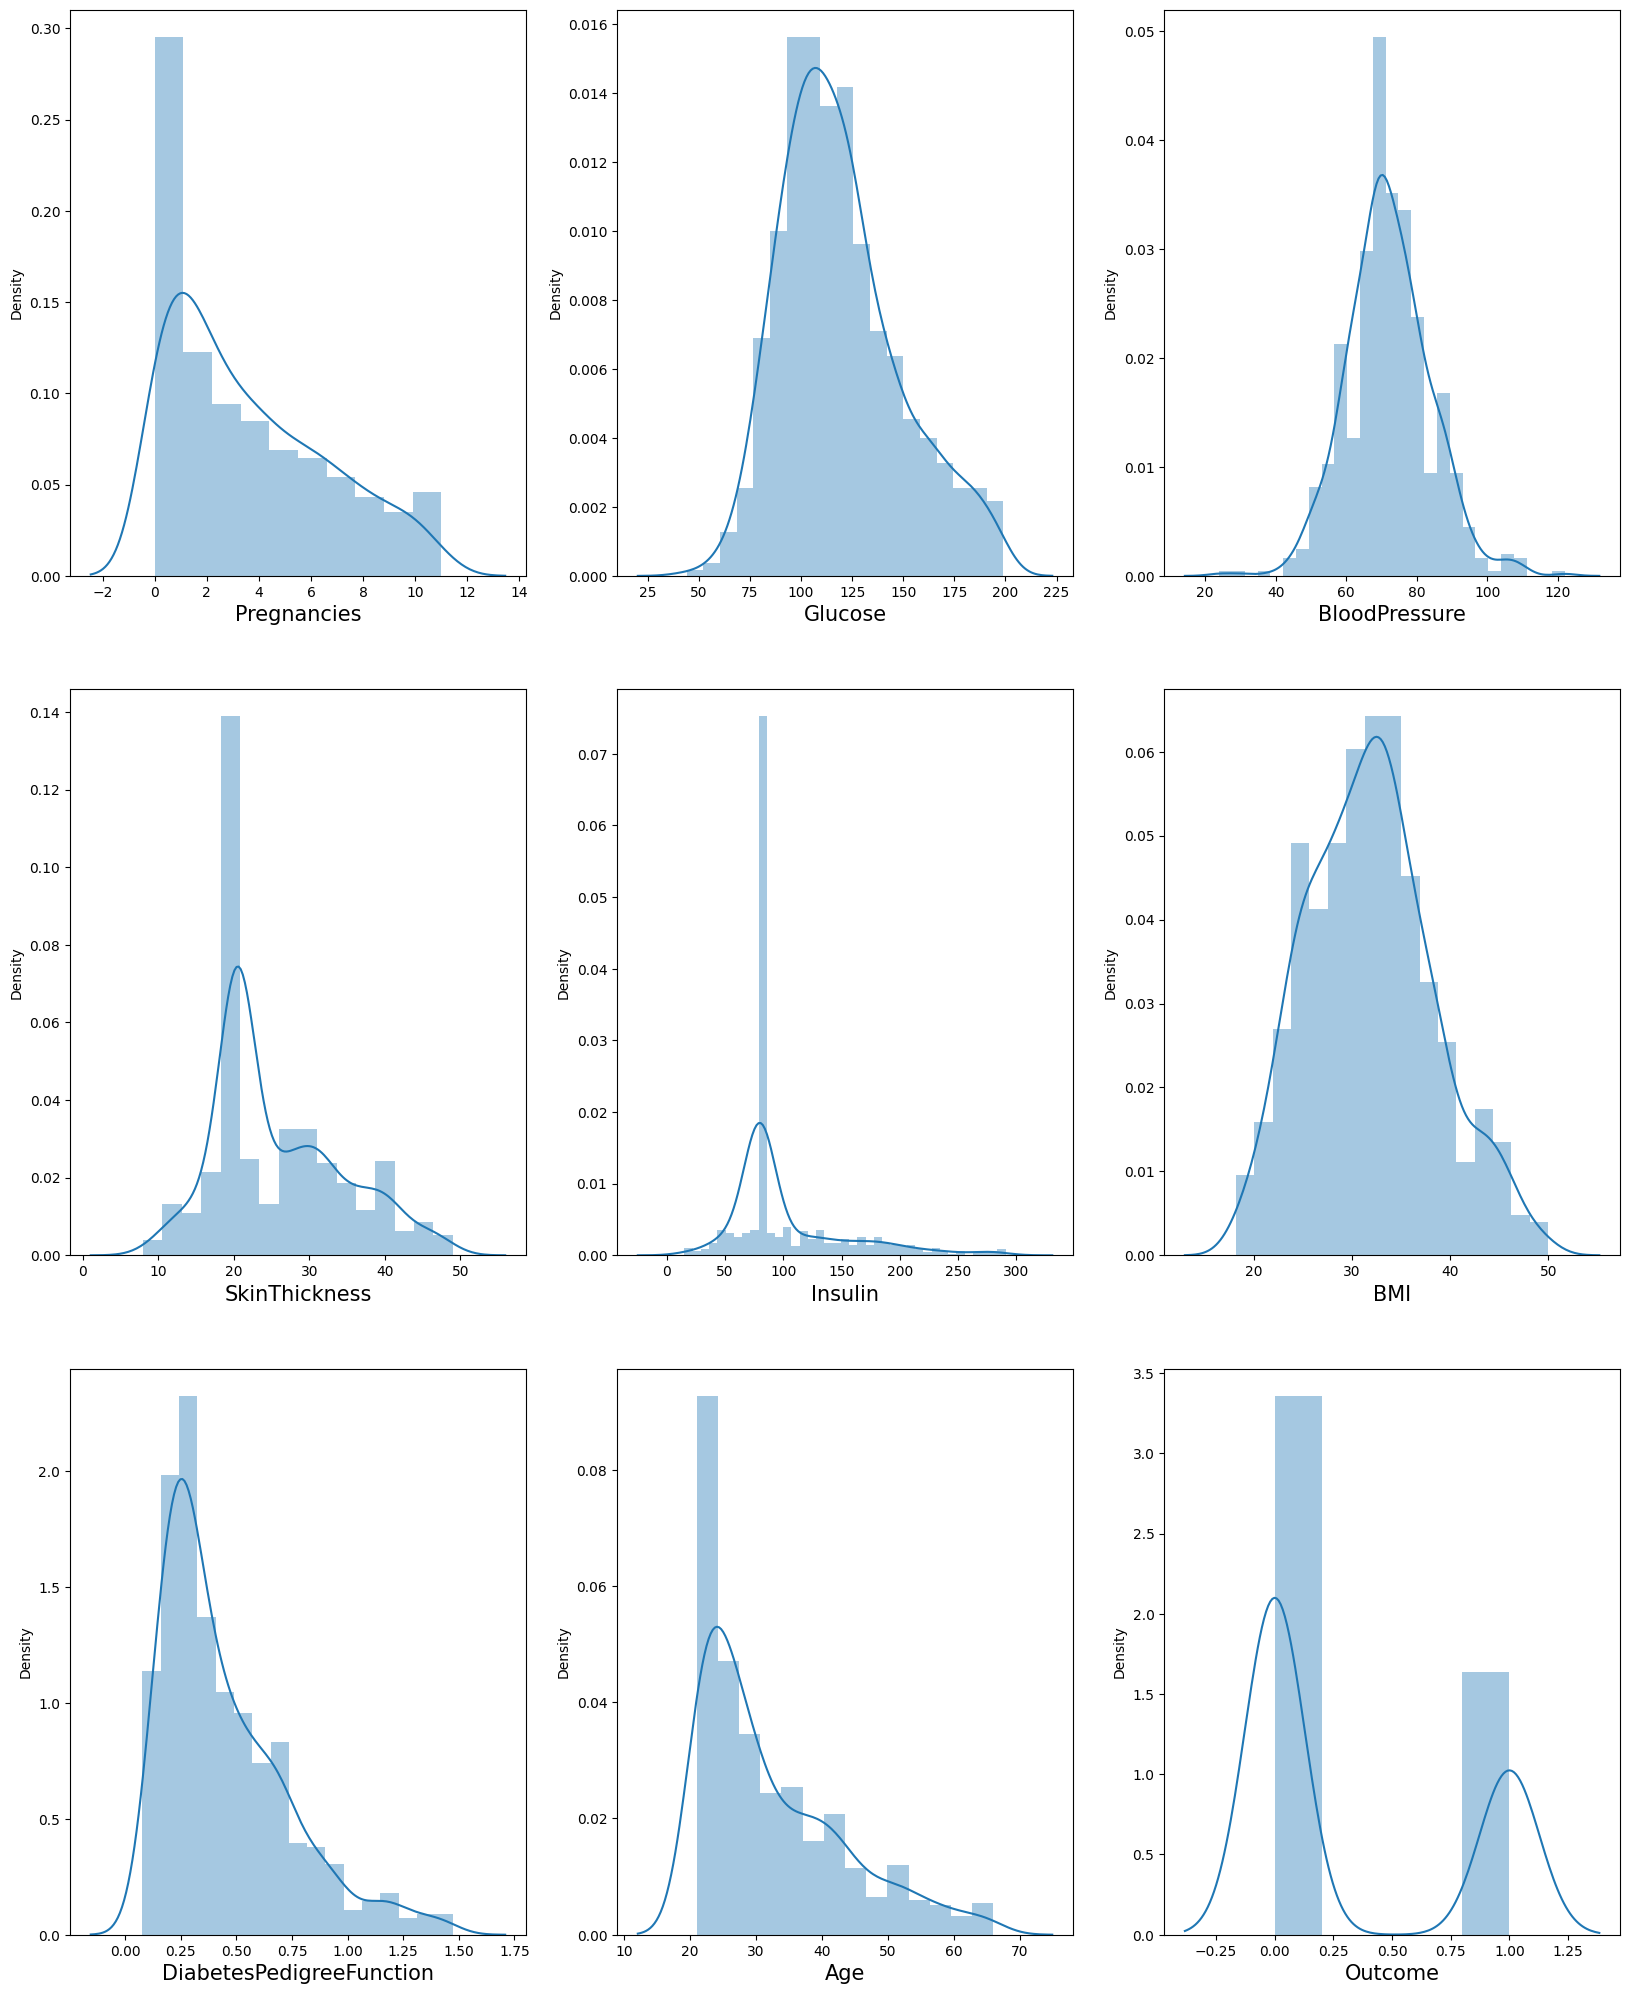

In [27]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

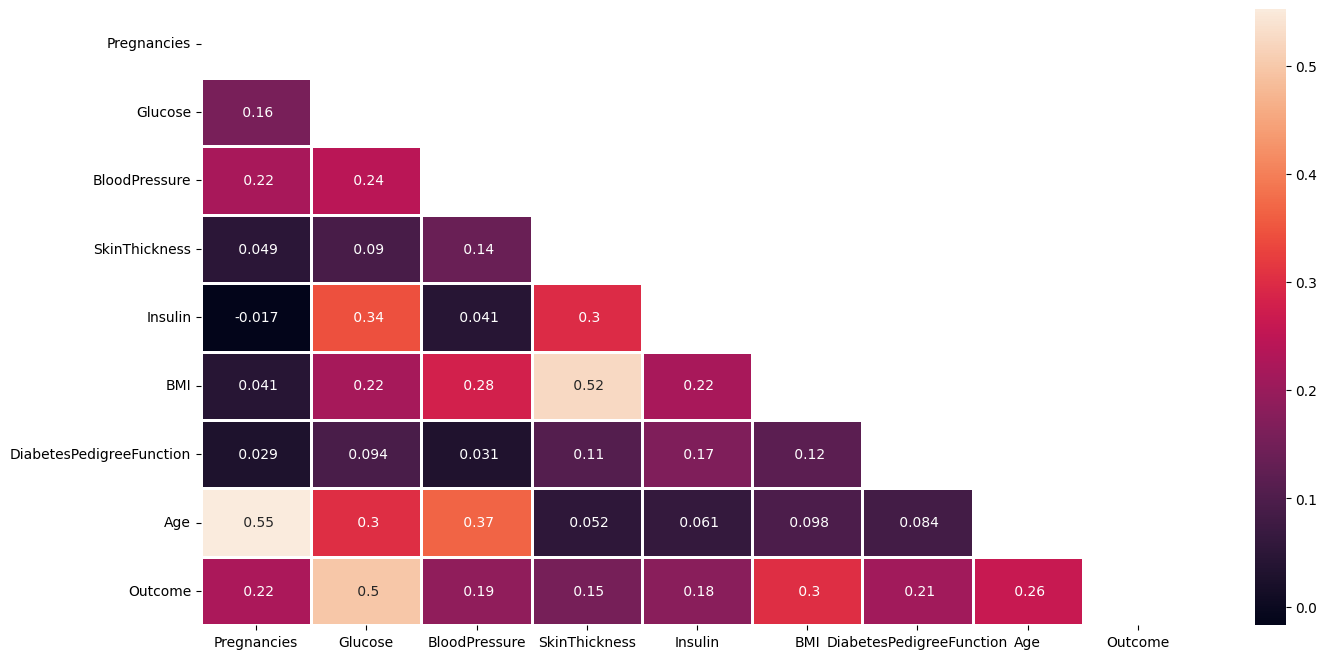

In [28]:
plt.figure(figsize=(16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = ' .2g', linewidths=1)
plt.show()

In [29]:
X = data.drop(columns=["Outcome"])
y = data['Outcome']

In [30]:
X.shape

(674, 8)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {lr_train_acc}")
print(f"Test accuracy is {lr_test_acc}")

Training accuracy is 0.805940594059406
Test accuracy is 0.7751479289940828


In [35]:
confusion_matrix(y_test, y_pred)

array([[106,  11],
       [ 27,  25]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.69      0.48      0.57        52

    accuracy                           0.78       169
   macro avg       0.75      0.69      0.71       169
weighted avg       0.77      0.78      0.76       169



In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {knn_train_acc}")
print(f"Test accuracy is {knn_test_acc}")

Training accuracy is 0.8376237623762376
Test accuracy is 0.7514792899408284


In [38]:
confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 28,  24]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       117
           1       0.63      0.46      0.53        52

    accuracy                           0.75       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.74      0.75      0.74       169



In [40]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {svc_train_acc}")
print(f"Test accuracy is {svc_test_acc}")

Training accuracy is 0.8534653465346534
Test accuracy is 0.7633136094674556


In [41]:
confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 24,  28]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       117
           1       0.64      0.54      0.58        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.76      0.76      0.76       169



In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {dtc_train_acc}")
print(f"Test accuracy is {dtc_test_acc}")

Training accuracy is 1.0
Test accuracy is 0.6982248520710059


In [44]:
confusion_matrix(y_test, y_pred)

array([[89, 28],
       [23, 29]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       117
           1       0.51      0.56      0.53        52

    accuracy                           0.70       169
   macro avg       0.65      0.66      0.65       169
weighted avg       0.71      0.70      0.70       169



In [48]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': range(2, 10), 'min_samples_split': range(2, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [49]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 5}
0.7683168316831683


In [50]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {dtc_train_acc}")
print(f"Test accuracy is {dtc_test_acc}")

Training accuracy is 0.80990099009901
Test accuracy is 0.7100591715976331


In [51]:
confusion_matrix(y_test, y_pred)

array([[85, 32],
       [17, 35]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       117
           1       0.52      0.67      0.59        52

    accuracy                           0.71       169
   macro avg       0.68      0.70      0.68       169
weighted avg       0.74      0.71      0.72       169



In [53]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='gini', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=4, n_estimators=180)

rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {rand_clf_train_acc}")
print(f"Test accuracy is {rand_clf_test_acc}")

Training accuracy is 0.80990099009901
Test accuracy is 0.7633136094674556


In [54]:
confusion_matrix(y_test, y_pred)

array([[109,   8],
       [ 32,  20]])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       117
           1       0.71      0.38      0.50        52

    accuracy                           0.76       169
   macro avg       0.74      0.66      0.67       169
weighted avg       0.75      0.76      0.74       169



In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

grid_params = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.005, 0.02, 0.01],
    'n_estimators': [80, 100, 150, 180, 200, 250]
}

grid_search = GridSearchCV(gb, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.001, 0.005, ...], 'loss': ['deviance', 'exponential'], 'n_estimators': [80, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'exponential'


In [65]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}
0.7663366336633664


In [66]:
gb = grid_search.best_estimator_

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {gb_train_acc}")
print(f"Test accuracy is {gb_test_acc}")

Training accuracy is 0.8118811881188119
Test accuracy is 0.7810650887573964


In [67]:
confusion_matrix(y_test, y_pred)

array([[112,   5],
       [ 32,  20]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       117
           1       0.80      0.38      0.52        52

    accuracy                           0.78       169
   macro avg       0.79      0.67      0.69       169
weighted avg       0.78      0.78      0.75       169



In [71]:
sgbc = GradientBoostingClassifier(learning_rate=0.01, subsample = 0.9, max_features = 0.75, loss = 'log_loss', n_estimators=100)
sgbc.fit(X_train, y_train)
y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {sgbc_train_acc}")
print(f"Test accuracy is {sgbc_test_acc}")

Training accuracy is 0.8158415841584158
Test accuracy is 0.7751479289940828


In [72]:
confusion_matrix(y_test, y_pred)

array([[112,   5],
       [ 33,  19]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       117
           1       0.79      0.37      0.50        52

    accuracy                           0.78       169
   macro avg       0.78      0.66      0.68       169
weighted avg       0.78      0.78      0.75       169



In [81]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 100, learning_rate=0.1)

cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

0:	learn: 0.6684908	total: 1.11ms	remaining: 110ms
1:	learn: 0.6473152	total: 1.91ms	remaining: 93.4ms
2:	learn: 0.6301843	total: 2.67ms	remaining: 86.4ms
3:	learn: 0.6099791	total: 3.56ms	remaining: 85.4ms
4:	learn: 0.5928931	total: 4.68ms	remaining: 88.9ms
5:	learn: 0.5788398	total: 5.57ms	remaining: 87.3ms
6:	learn: 0.5664744	total: 6.32ms	remaining: 83.9ms
7:	learn: 0.5560134	total: 7.06ms	remaining: 81.2ms
8:	learn: 0.5449953	total: 7.92ms	remaining: 80ms
9:	learn: 0.5350870	total: 8.72ms	remaining: 78.5ms
10:	learn: 0.5259774	total: 9.51ms	remaining: 76.9ms
11:	learn: 0.5173412	total: 10.3ms	remaining: 75.6ms
12:	learn: 0.5079766	total: 11.3ms	remaining: 75.3ms
13:	learn: 0.4997023	total: 12.1ms	remaining: 74.5ms
14:	learn: 0.4923216	total: 13ms	remaining: 73.6ms
15:	learn: 0.4855090	total: 14.2ms	remaining: 74.3ms
16:	learn: 0.4792331	total: 15.1ms	remaining: 73.6ms
17:	learn: 0.4726980	total: 15.8ms	remaining: 72.1ms
18:	learn: 0.4668411	total: 16.7ms	remaining: 71.2ms
19:	lear

In [82]:
cat_train_acc = accuracy_score(y_train, cat.predict(X_train))
cat_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {cat_train_acc}")
print(f"Test accuracy is {cat_test_acc}")

Training accuracy is 0.8831683168316832
Test accuracy is 0.7928994082840237


In [93]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 100)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [94]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy is {xgb_train_acc}")
print(f"Test accuracy is {xgb_test_acc}")

Training accuracy is 0.803960396039604
Test accuracy is 0.7810650887573964


In [105]:
train, val_train, test, val_test = train_test_split(X, y, test_size=0.5, random_state=355)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=355)

In [107]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
svm = SVC()
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [109]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

In [110]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [111]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

In [112]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [113]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))

print(stacking_acc)


0.8235294117647058


In [115]:
confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 7, 13]])

In [116]:
print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.72      0.65      0.68        20

    accuracy                           0.82        68
   macro avg       0.79      0.77      0.78        68
weighted avg       0.82      0.82      0.82        68



In [117]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SGB', 'XgBoost', 'Stacking', 'Cat Boost']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, gb_test_acc, sgbc_test_acc, xgb_test_acc, stacking_acc, cat_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Stacking,0.823529
9,Cat Boost,0.792899
5,Gradient Boosting,0.781065
7,XgBoost,0.781065
6,SGB,0.775148
0,Logistic Regression,0.775148
4,Random Forest,0.763314
2,SVC,0.763314
1,KNN,0.751479
3,Decision Tree,0.710059


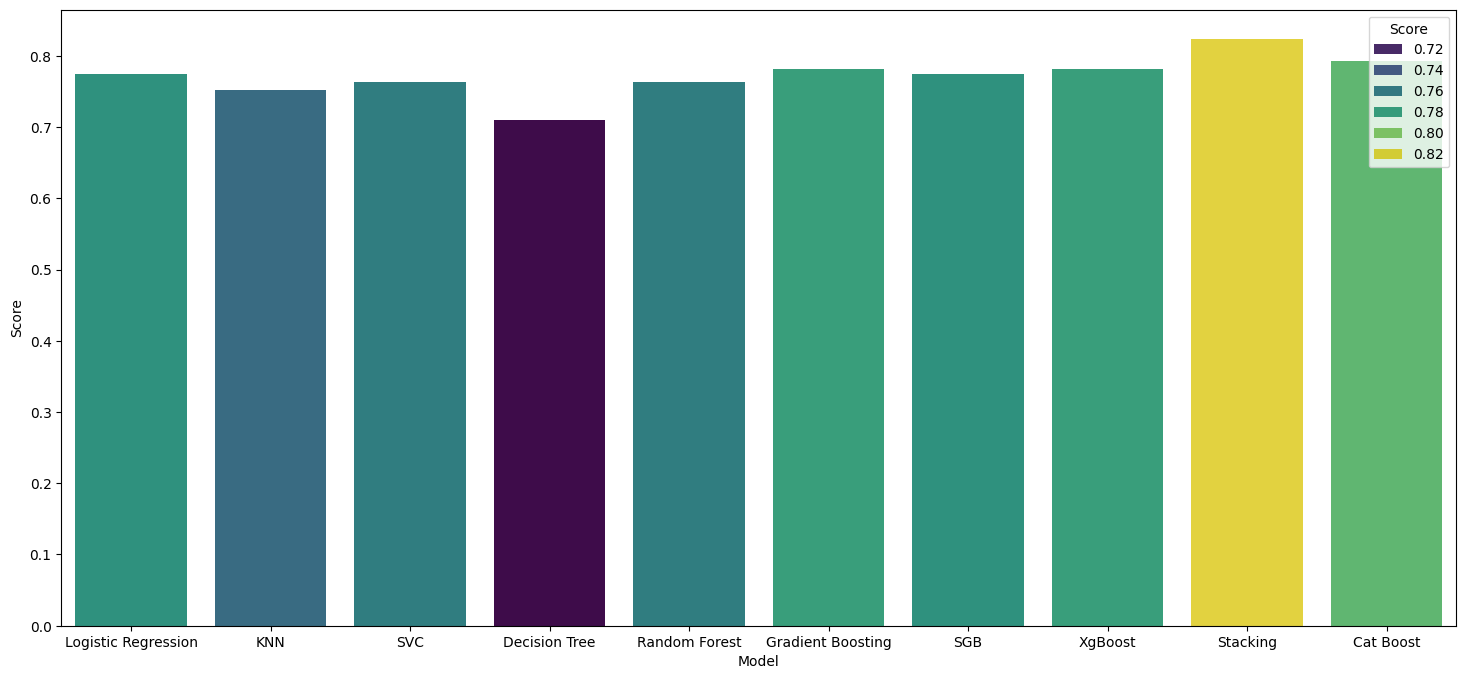

In [119]:
plt.figure(figsize=(18, 8))

sns.barplot(x = 'Model', y='Score', data = models,
            palette = 'viridis', hue = 'Score')

plt.show()